In [72]:
import scipy
import scipy.fftpack
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt

In [73]:
# Create Pitch
def pitchMaker(frequency=262,magnitude = 1,time = 1,sr = 22050):
    t = np.arange(0, time,1/sr)
    data = magnitude*np.sin(2*np.pi*frequency*t)    
    return data

In [74]:
def plotTimeDomain(data,sr=22050):
    max_points = 1000
    librosa.display.waveplot(data[:max_points], sr=44100)

In [94]:
def plotFreqDomain(freq,sr=22050):
    freq_plot = np.abs(freq)
    plt.plot(freq_plot)
    plt.xlabel('Frequency (HZ)')
    plt.ylabel('Magnitude of X_k')
    plt.show()
def plotFreqDomain_zoom(freq,sr=22050):
    freq_plot = np.abs(freq)[:1000]
    plt.plot(freq_plot)
    plt.xlabel('Frequency (HZ)')
    plt.ylabel('Magnitude of X_k')
    plt.show()

In [109]:
data = pitchMaker(262)

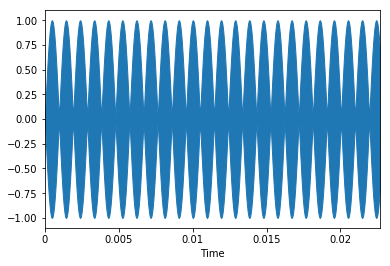

In [110]:
plotTimeDomain(data)

In [111]:
Audio(data, rate=22050)

In [112]:
freq = scipy.fftpack.fft(data)

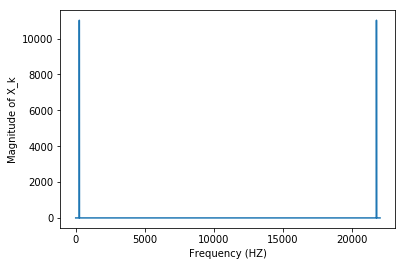

In [113]:
plotFreqDomain(freq)

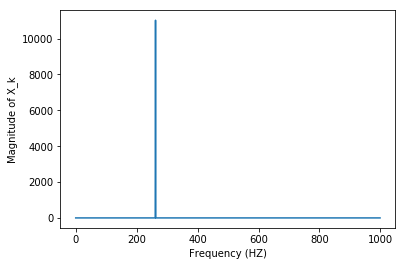

In [114]:
plotFreqDomain_zoom(freq)

In [115]:
song,sr = librosa.core.load('Mary.mp3')

/home/dyang/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [116]:
Audio(song, rate=22050)

In [122]:
S = np.abs(librosa.stft(song, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

[Text(0.5, 1.0, 'Spectrogram')]

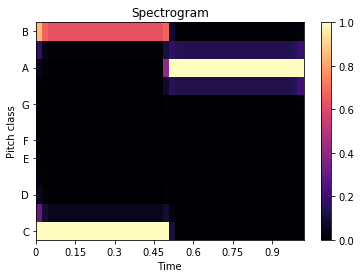

In [123]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Spectrogram')